<a href="https://colab.research.google.com/github/hks1409/Artificial-Intelligence/blob/main/AI_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
170508288/170498071 [==============================] - 3s 0us/step


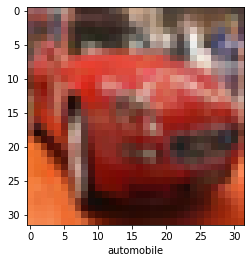

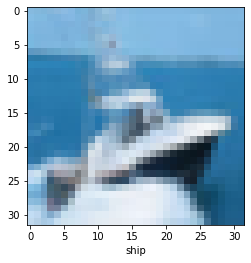

In [ ]:
IMG_INDEX = 5  
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

IMG_INDEX = 8  
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
import tensorflow as tf

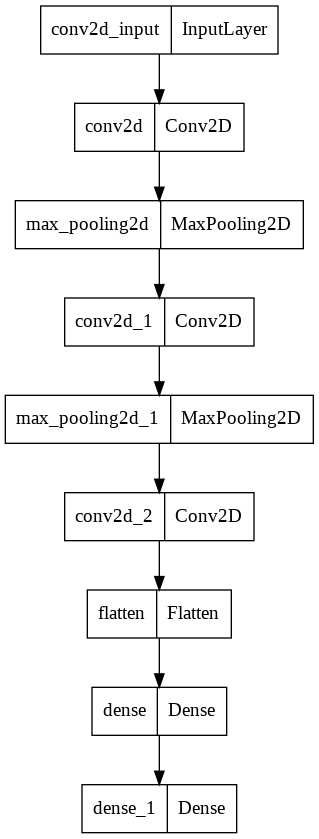

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4,
validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5382 - accuracy: 0.4385 - val_loss: 1.2681 - val_accuracy: 0.5453
Epoch 2/4
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1564 - accuracy: 0.5902 - val_loss: 1.1176 - val_accuracy: 0.6037
Epoch 3/4
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0104 - accuracy: 0.6462 - val_loss: 1.0365 - val_accuracy: 0.6364
Epoch 4/4
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9150 - accuracy: 0.6783 - val_loss: 0.9076 - val_accuracy: 0.6834


In [ ]:
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("ACCURACY : ",test_acc)
print("LOSS : ",est_loss)

313/313 - 4s - loss: 0.9076 - accuracy: 0.6834 - 4s/epoch - 12ms/step
ACCURACY :  0.6833999752998352
LOSS :  0.907562792301178
